In [19]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Import and process the data

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/Autoencoders

/content/drive/MyDrive/Course Material/Supervised Machine Learning/Autoencoders


In [22]:
data = pd.read_csv('mnist_train.csv')

In [23]:
data = np.array(data)
data = data[0:10000,:] # Extracting first 10000 samples
data.shape

(10000, 785)

In [24]:
# Data without labels because Unsupervised learning
data = data[:,1:]

# Data Normalization
dataN = data / np.max(data)

# Converting to pytorch tensor
dataT = torch.tensor( dataN, dtype = torch.float32)

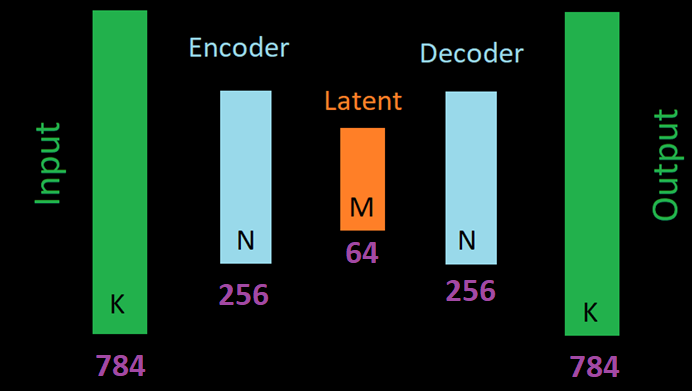

# Create Autoencoder Using Class

In [25]:
class AE_Model(nn.Module):
  def __init__(self):
    super().__init__()

    self.input = nn.Linear(784,256) # Input Layer.  28 x 28 = 784

    self.encoder = nn.Linear(256,64) # Encoder Layer

    self.latent = nn.Linear(64,256)  # Latent Layer

    self.decoder = nn.Linear(256,784) # Decoder Layer


  def forward(self,x):
    x = F.relu( self.input(x) )
    x = F.relu( self.encoder(x) )
    x = F.relu( self.latent(x) )
    y = torch.sigmoid( self.decoder(x) )  # Here we are using sigmoid activation because we have normalize the input data [0,1]
                                          # and we want output to be in the same range.
    return y

# Creating Model Instance and Setting Parameters

In [26]:
model = AE_Model()

lossfunc = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(),lr=.001)

In [29]:
 random_idx = np.random.choice(dataT.shape[0], size=32)
 random_idx

array([5124, 7851, 5314, 8368, 9589, 4798, 6038, 9450, 3272, 3157, 2553,
       7010, 6560, 3747, 9070, 6976, 1527,  873, 5418, 8667, 6864, 5028,
       2131, 2619, 4053, 2747, 4409, 6397, 7886, 8630, 5293, 2871])

# Train the Model

In [30]:
epochs = 10001

losses = torch.zeros(epochs)

for epoch in range(epochs):

  # Selecting a batchsize  of 32.

  random_idx = np.random.choice(dataT.shape[0], size=32)

  X = dataT[random_idx,:]
  ypred = model(X)
  loss = lossfunc(ypred,X) # Comparing predictions with the input data.

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  losses[epoch] = loss.item()

  if (epoch % 1000) == 0:

      print(f' epochs : {epoch}  loss : {loss : 2.2f}')

 epochs : 0  loss :  0.23
 epochs : 1000  loss :  0.02
 epochs : 2000  loss :  0.01
 epochs : 3000  loss :  0.01
 epochs : 4000  loss :  0.01
 epochs : 5000  loss :  0.01
 epochs : 6000  loss :  0.01
 epochs : 7000  loss :  0.01
 epochs : 8000  loss :  0.01
 epochs : 9000  loss :  0.00
 epochs : 10000  loss :  0.00


# Performance Visualization

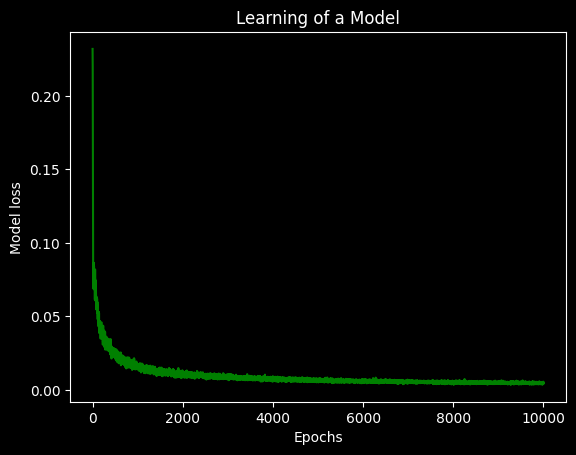

In [31]:
plt.plot(losses, color = 'g', ls = '-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('Learning of a Model')
plt.show()

# Model Testing

In [32]:
X = dataT[:7,:]  # Extracting first seven samples
ypred = model(X)

# Visualizing Test Performance

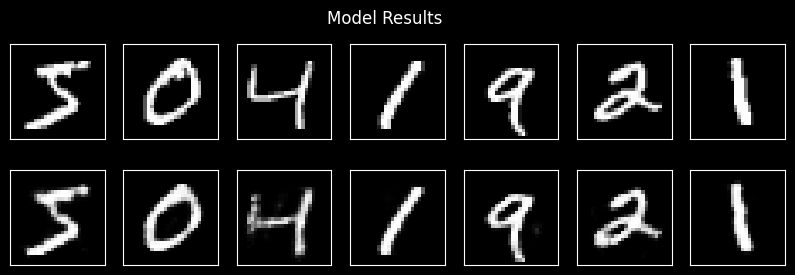

In [33]:
fig,axes = plt.subplots(2,7,figsize=(10,3))

for i in range(7):
  axes[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axes[1,i].imshow(ypred[i,:].view(28,28).detach() ,cmap='gray')
  axes[0,i].set_xticks([]), axes[0,i].set_yticks([])
  axes[1,i].set_xticks([]), axes[1,i].set_yticks([])

plt.suptitle('Model Results')
plt.show()

# Create Noisy Images

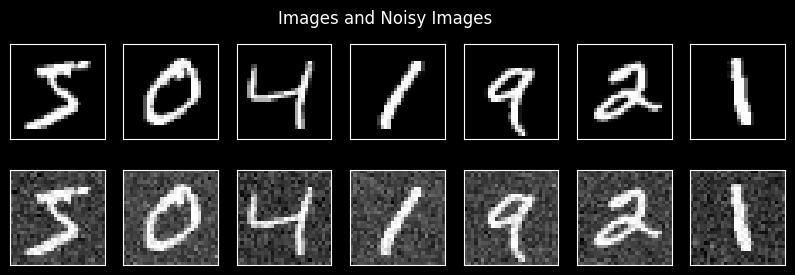

In [34]:
X = dataT[:7,:] # Pick first 7 images

# Adding Gaussian Noise to the Images

Xnoise = X + 0.1 * torch.randn(X.shape)

Xnoise[Xnoise>1] = 1  # Values greater than one will clip to one.

fig,axes = plt.subplots(2,7,figsize=(10,3))

for i in range(7):
  axes[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axes[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axes[0,i].set_xticks([]), axes[0,i].set_yticks([])
  axes[1,i].set_xticks([]), axes[1,i].set_yticks([])
plt.suptitle('Images and Noisy Images')
plt.show()

# Image Denoising

In [35]:
ypred_noise = model(Xnoise)

# Visualize Image Denoising

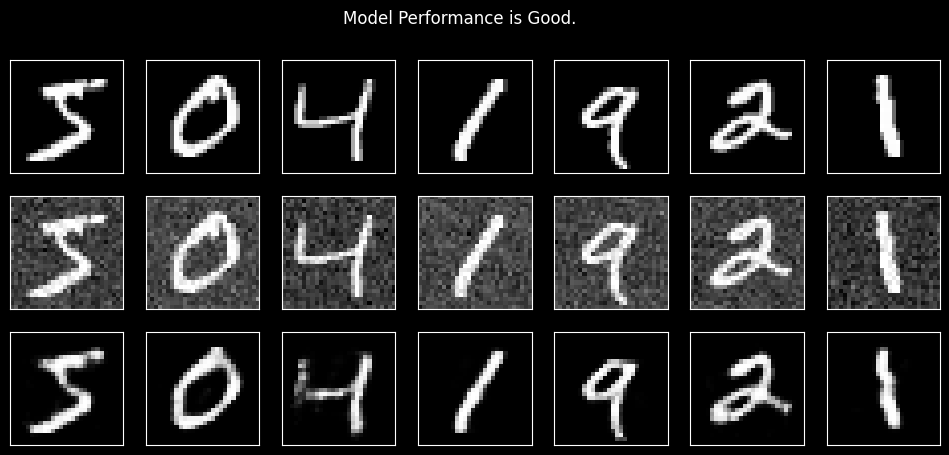

In [36]:
fig,axes = plt.subplots(3,7,figsize=(12,5))

for i in range(7):
  axes[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axes[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axes[2,i].imshow(ypred_noise[i,:].view(28,28).detach() ,cmap='gray')
  axes[0,i].set_xticks([]), axes[0,i].set_yticks([])
  axes[1,i].set_xticks([]), axes[1,i].set_yticks([])
  axes[2,i].set_xticks([]), axes[2,i].set_yticks([])

plt.suptitle('Model Performance is Good.')
plt.show()